PHYS 381: Computational Physics

Assignment 3: Projectile motion under air resistance

Jared Crebo 30085839

Kernel: Python 3.10.11 | IDE: Visual Studio Code

4 Projectile motion under air resistance - Part B

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sphere Parameters
B_sphere = 1.6e-4 # Ns/m^2
C_sphere = 0.25 # Ns^2 / m^4
D_sphere = 1e-4 # m
g = 9.81 # m/s^2
density = 2e3 # kg/m^3

# Mass = rho * volume
mass = density * 4/3*np.pi*(D_sphere/2)**3 # kg
# Define timestep size in seconds
dt = 0.01

position_air_resistance_quad() takes the initial conditions of the projectile and calculates its trajectory over time, taking into account the effects of air resistance. It uses equations 6 and 7 in the assignment prompt to iterate the position at each timestep. This problem assumes quadratic dependence of the air resistance which is valid for $Dv > 0.1$.

$\frac{dv_x}{dt}=-\frac{c}{m}\sqrt{(v_x^2+v_y^2)}v_x$

$\frac{dv_y}{dt}=-g-\frac{c}{m}\sqrt{(v_x^2+v_y^2)}v_y$

It returns the time and x,y coordinates of the projectile. 

In [ ]:
def position_air_resistance_quad(mass, C, D, x1, y1, vx1, vy1):
    '''
    Input Parameters
    mass - mass of object (kg)
    C - quadratic air resistance coefficient (Ns^2/m^4)
    D - diameter of object (m)
    x1 - initial x coordinate
    y1 - initial y coordinate
    vx1 - initial x velocity
    vy1 - initial y velocity

    Function uses Explicit Euler method to calculate the change in (x,y) position wrt time
    Function assumes quadratic air resistance
    Function returns three Python lists of time and x,y positions
    '''
    
    # Initialize time, position, and velocity variables
    # Implement initial conditions into first entry in list
    y = [y1]
    x = [x1]
    t = [0]
    vy = [vy1]
    vx = [vx1]

    # Calculate linear air resistance coefficient
    c = C*D**2
    
    i = 0
    while y[i] >= 0: # Iterate until object hits the ground (y = 0)
        i += 1
        dvy = - g*dt - c/mass * np.sqrt(vx[i-1]**2 + vy[i-1]**2) * vy[i-1] * dt # Calculate change in vertical velocity using Explicit Euler method on quadratic air resistance equation
        vy.append(vy[i-1] + dvy) # Add change in vertical velocity to the vertical velocity list
        dvx = -c/mass * np.sqrt(vx[i-1]**2 + vy[i-1]**2) * vx[i-1] * dt # Calculate change in horizontal velocity using Explicit Euler method on quadratic air resistance equation
        vx.append(vx[i-1] + dvx) # Add change in horizontal velocity to the horizontal velocity list

        y.append(y[i-1] + vy[i-1] * t[i-1]) # Update new y position based on new velocity
        x.append(x[i-1] + vx[i-1] * t[i-1]) # Update new x position based on new velocity
        t.append(t[i-1] + dt) # Update t + dt
    return t, x, y

position_air_resistance_lin() takes the initial conditions of the projectile and calculates its trajectory over time, taking into account the effects of air resistance. It uses equations 4 and 5 in the assignment prompt to iterate the position at each timestep. 

$\frac{dv_x}{dt}=-\frac{b}{m}v_x$

$\frac{dv_y}{dt}=-g-\frac{b}{m}v_y$

It returns the time and x,y coordinates of the projectile. 

In [ ]:
def position_air_resistance_lin(mass, B, D, x1, y1, vx1, vy1):
    '''
    Input Parameters
    mass - mass of object (kg)
    B - linear air resistance coefficient (Ns/m^2)
    D - diameter of object (m)
    x1 - initial x coordinate
    y1 - initial y coordinate
    vx1 - initial x velocity
    vy1 - initial y velocity

    Function uses Explicit Euler method to calculate the change in (x,y) position wrt time
    Function assumes linear air resistance
    Function returns three Python lists of time and x,y positions
    '''

    # Initialize time, position, and velocity variables
    # Implement initial conditions into first entry in list
    y = [y1]
    x = [x1]
    t = [0]
    vy = [vy1]
    vx = [vx1]

    # Calculate linear air resistance coefficient
    b = B*D
    
    i = 0
    while y[i] >= 0: # Iterate until object hits the ground (y = 0)
        i += 1
        dvy = - g*dt - b/mass * vy[i-1] * dt # Calculate change in vertical velocity using Explicit Euler method on linear air resistance equation
        vy.append(vy[i-1] + dvy) # Add change in vertical velocity to the vertical velocity list
        dvx = -b/mass * vx[i-1] * dt # Calculate change in horizontal velocity using Explicit Euler method on linear air resistance equation
        vx.append(vx[i-1] + dvx) # Add change in horizontal velocity to the horizontal velocity list

        y.append(y[i-1] + vy[i-1] * t[i-1]) # Update new y position based on new velocity
        x.append(x[i-1] + vx[i-1] * t[i-1]) # Update new x position based on new velocity
        t.append(t[i-1] + dt) # Update t + dt
    return t, x, y

position_vacuum() takes the same initial conditions of the projectile and calculates its trajectory over time, without taking into account the effects of air resistance. It uses the basic kinematic equations it iterate the position at each timestep. 

$y = y_o + v_{yo} t - 0.5 g t^2$

$x = x_o + v_{xo} t$

It also returns the time and x,y coordinates of the projectile. 

In [ ]:
def position_vacuum(mass, x1, y1, vx1, vy1):
    '''
    Input Parameters
    mass - mass of object (kg)
    x1 - initial x coordinate
    y1 - initial y coordinate
    vx1 - initial x velocity
    vy1 - initial y velocity

    Function uses kinematic equations to calculate the change in (x,y) position wrt time
    Function assumes no air resistance
    Function returns three Python lists of time and x,y positions
    '''

    # Initialize time and position variables
    # Implement initial conditions into first entry in list
    y = [y1]
    x = [x1]
    t = [0]
    
    i = 0
    while y[i] >= 0: # Iterate until object hits the ground (y = 0)
        i += 1
        y.append(y[i-1] + vy1*t[i-1] - 0.5*g*t[i-1]**2) # Calculate change in vertical position using kinematic equations
        x.append(x[i-1] + vx1*t[i-1]) # Calculate change in horizontal position using kinematic equations
        t.append(t[i-1] + dt) # Update t + dt
    return t, x, y

(-0.19499999999999998, 4.095, -0.15376624999999985, 1.05494125)

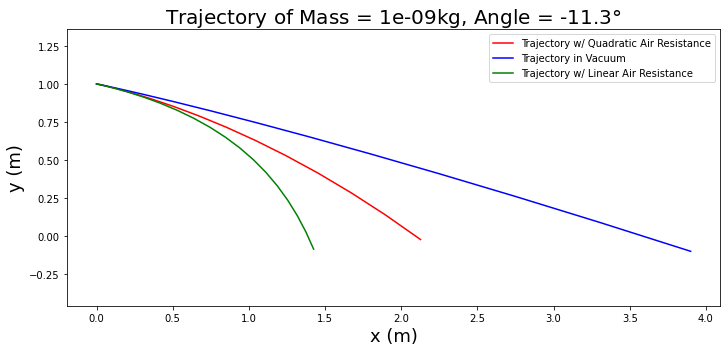

In [ ]:
# Initial Conditions (x, y, vx, vy)
init_conds = [0, 1, 5, -1] # SI units
# Set an array of init_conds to easily test for different initial conditions and plot them

# Plot the trajectories of projectile motion with and without linear air resistance with the same initial conditions
fig, ax = plt.subplots(figsize=[10,5])
t1, x1, y1 = position_air_resistance_quad(mass, C_sphere, D_sphere, init_conds[0], init_conds[1], init_conds[2], init_conds[3]) # plot trajectory with quadratic air resistance
t2, x2, y2 = position_vacuum(mass, init_conds[0], init_conds[1], init_conds[2], init_conds[3]) # plot trajectory in a vacuum
t3, x3, y3 = position_air_resistance_lin(mass, B_sphere, D_sphere, init_conds[0], init_conds[1], init_conds[2], init_conds[3]) # plot trajectory with linear air resistance
ax.plot(x1, y1, color = "red", label = "Trajectory w/ Quadratic Air Resistance")
ax.plot(x2, y2, color = "blue", label = "Trajectory in Vacuum")
ax.plot(x3, y3, color = "green", label = "Trajectory w/ Linear Air Resistance")
ax.set_xlabel("x (m)", fontsize=18)
ax.set_ylabel("y (m)", fontsize=18)
ax.set_title("Trajectory of Mass = "+str('{:0.1}'.format(mass))+"kg, Angle = "+str('{:0.3}'.format(np.rad2deg(np.arctan(init_conds[3]/init_conds[2]))))+"$\degree$", fontsize=20)
fig.tight_layout()
ax.legend()
ax.axis('equal')

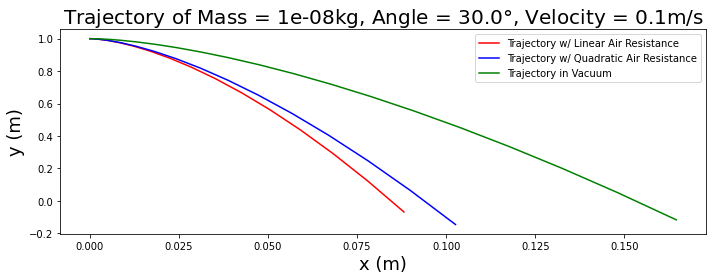

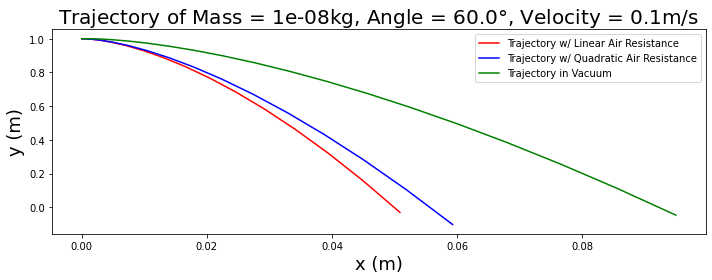

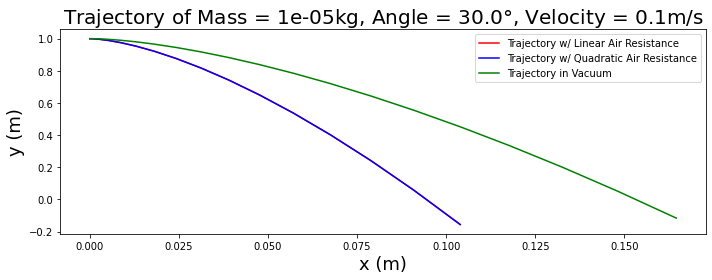

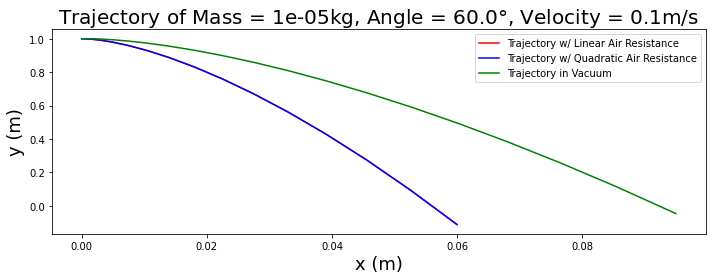

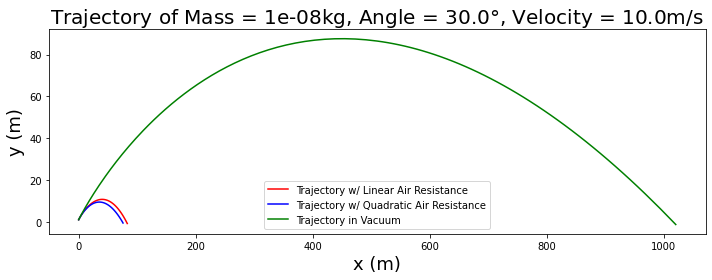

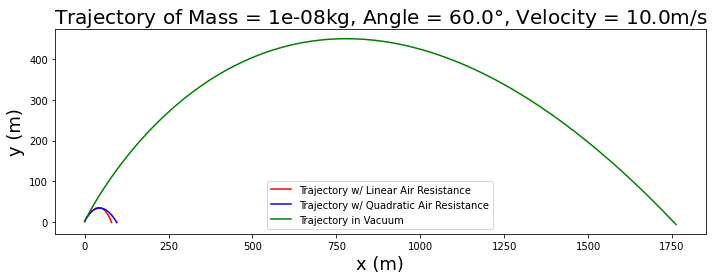

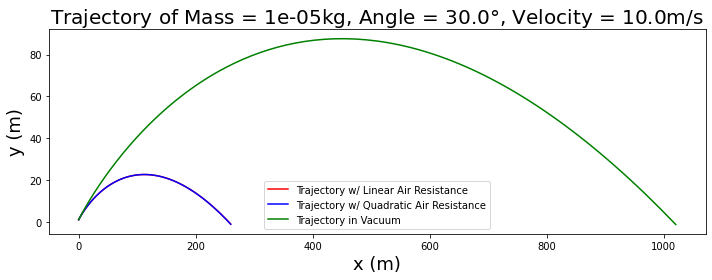

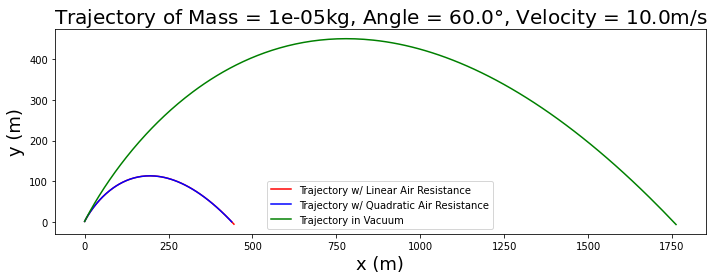

In [ ]:

for v in np.logspace(-1, 1, 2): # For a range of initial velocities
    for m in np.logspace(-8, -5, 2): # For a range of masses
        for i in np.linspace(np.pi/6, 2*np.pi/6, 2): # For a range of launching angles
            # Set Initial Conditions (x, y, vx, vy)
            init_conds = [0, 1, v*np.cos(i), v*np.sin(i)]

            # Calculate trajectories with linear air resistance, quadratic air resistance, and no air resistance with the same initial conditions
            t1, x1, y1 = position_air_resistance_lin(m, B_sphere, D_sphere, init_conds[0], init_conds[1], init_conds[2], init_conds[3])
            t2, x2, y2 = position_air_resistance_quad(m, C_sphere, D_sphere, init_conds[0], init_conds[1], init_conds[2], init_conds[3])
            t3, x3, y3 = position_vacuum(m, init_conds[0], init_conds[1], init_conds[2], init_conds[3])

            # Plot each set of trajectories for every unique set of initial conditions
            fig, ax = plt.subplots(figsize=[10,4])
            ax.plot(x1, y1, color = "red", label = "Trajectory w/ Linear Air Resistance")
            ax.plot(x2, y2, color = "blue", label = "Trajectory w/ Quadratic Air Resistance")
            ax.plot(x3, y3, color = "green", label = "Trajectory in Vacuum")
            ax.set_xlabel("x (m)", fontsize=18)
            ax.set_ylabel("y (m)", fontsize=18)
            ax.set_title("Trajectory of Mass = "+str('{:0.1}'.format(m))+"kg, Angle = "+str('{:0.3}'.format(np.rad2deg(i)))+"$\degree$, Velocity = "+str('{:0.3}'.format(v))+"m/s", fontsize=20)
            fig.tight_layout()
            ax.legend()